## Demonstration of Selected Time-Domain Features

This jupyter notebook is part of a [collection of notebooks](../index.ipynb) on various topics of Digital Signal Processing. Please direct questions and suggestions to [Sascha.Spors@uni-rostock.de](mailto:Sascha.Spors@uni-rostock.de).

This notebook demonstrates the computation and usage of the two different time-domain features, power and [zero-crossing rate](https://en.wikipedia.org/wiki/Zero-crossing_rate) per segment. The audio and music processing toolkit [`librosa`](https://librosa.org/) is used for the feature extraction.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import librosa

segment_length = 2048  # length of segments in samples
hop_size = 512  # hop size in samples

### Vocal

Lets first take a look at vocal, more specifically a recording of the vocal 'o'. 

<audio src="../data/vocal_o.wav" controls>

First the recording is loaded and the signal plotted for illustration.

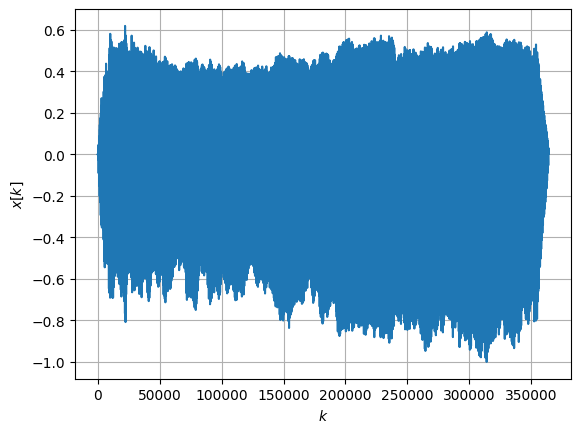

In [2]:
vocal, fs = librosa.load('../data/vocal_o.wav', sr=None)
vocal = vocal / np.max(np.abs(vocal))

def plot_signal(x):
    plt.plot(x)
    plt.xlabel(r'$k$')
    plt.ylabel(r'$x[k]$')
    plt.grid()


plot_signal(vocal)

Now we extract the time-domain features power and zero-crossing rate (ZCR) using the functions [`librosa.feature.rms`](https://librosa.org/doc/main/generated/librosa.feature.rms.html#librosa.feature.rms) and [`librosa.feature.zero_crossing_rate`](https://librosa.org/doc/main/generated/librosa.feature.zero_crossing_rate.html). Both functions segment the signal first and then calculate the features on a per segment basis. Note, the RMS value is the square root of the power.

In [3]:
RMS = librosa.feature.rms(
    y=vocal, frame_length=segment_length, hop_length=hop_size)
P_vocal = np.squeeze(RMS)**2

ZCR = librosa.feature.zero_crossing_rate(
    vocal, frame_length=segment_length, hop_length=hop_size)
ZCR_vocal = np.squeeze(ZCR)

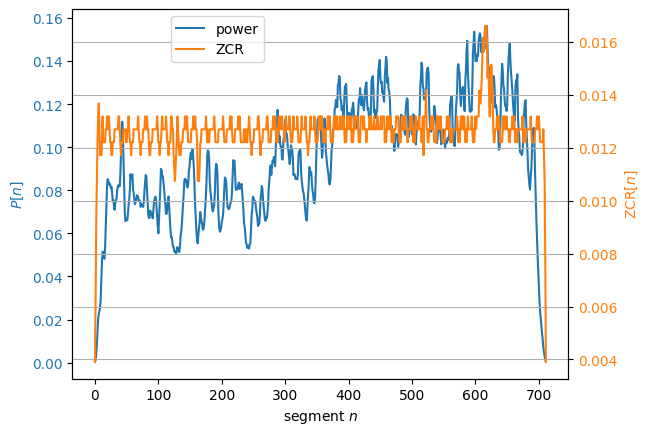

In [4]:
def plot_E_ZCR(P, ZCR):

    fig, ax1 = plt.subplots()

    ax1.plot(P, label='power', color='C0')
    ax1.set_xlabel(r'segment $n$')
    ax1.set_ylabel(r'$P[n]$', color='C0')
    ax1.tick_params(axis='y', labelcolor='C0')

    ax2 = ax1.twinx()
    ax2.plot(ZCR, label='ZCR', color='C1')
    ax2.set_ylabel(r'$\mathrm{ZCR}[n]$', color='C1')
    ax2.tick_params(axis='y', labelcolor='C1')
    ax2.grid()

    fig.legend(loc='upper right', bbox_to_anchor=(
        0.4, 1), bbox_transform=ax1.transAxes)


plot_E_ZCR(P_vocal, ZCR_vocal)

We can observe that the power shows a low variation over the frames and that the ZCR is approximately constant besides boundary effects and one outlier. The reason is the specific harmonic structure of vocals.

### Speech

We now inspect the same features for a speech signal

<audio src="../data/speech.wav" controls>

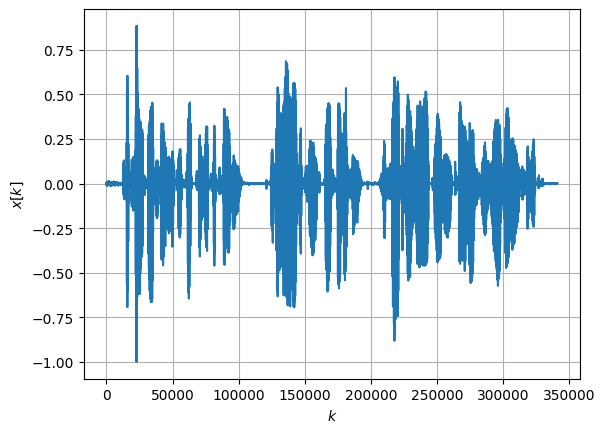

In [5]:
speech, fs = librosa.load('../data/speech.wav', sr=None)
speech = speech / np.max(np.abs(speech))
plot_signal(speech)

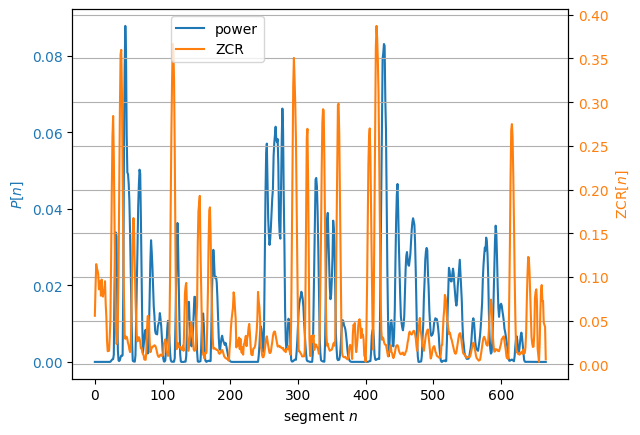

In [6]:
RMS = librosa.feature.rms(
    y=speech, frame_length=segment_length, hop_length=hop_size)
P_speech = np.squeeze(RMS)**2

ZCR = librosa.feature.zero_crossing_rate(
    speech, frame_length=segment_length, hop_length=hop_size)
ZCR_speech = np.squeeze(ZCR)

plot_E_ZCR(P_speech, ZCR_speech)

### Music

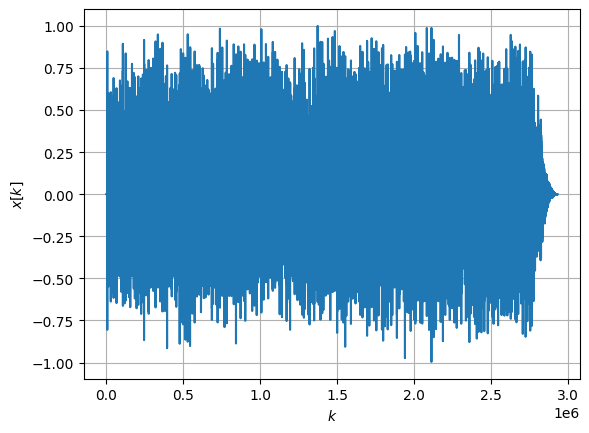

In [7]:
path = librosa.util.example('fishin')
music, fs = librosa.load(path, sr=None)
music = music / np.max(np.abs(music))

plot_signal(music)

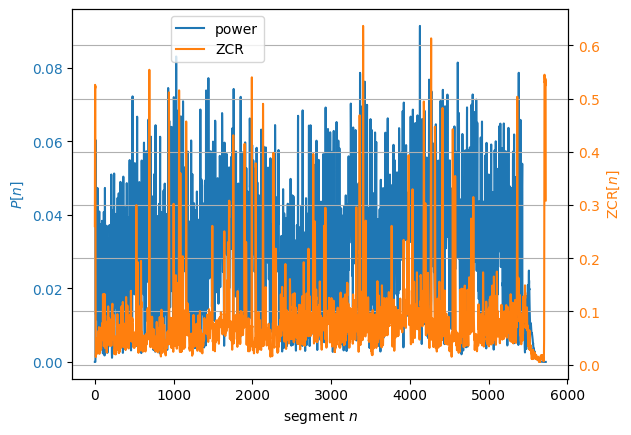

In [8]:
RMS = librosa.feature.rms(
    y=music, frame_length=segment_length, hop_length=hop_size)
P_music = np.squeeze(RMS)**2

ZCR = librosa.feature.zero_crossing_rate(
    music, frame_length=segment_length, hop_length=hop_size)
ZCR_music = np.squeeze(ZCR)

plot_E_ZCR(P_music, ZCR_music)

### Comparison speech and music

The time-domain features power and ZCR may be used to classify segments into speech or music (e.g. DOI [10.1109/TMM.2004.840604](https://doi.org/10.1109/TMM.2004.840604)). In order to illustrate the statistical properties of both features for above examples, their probability density functions (PDFs) are estimated in the following. Please observe the differences in the PDFs for speech and music.

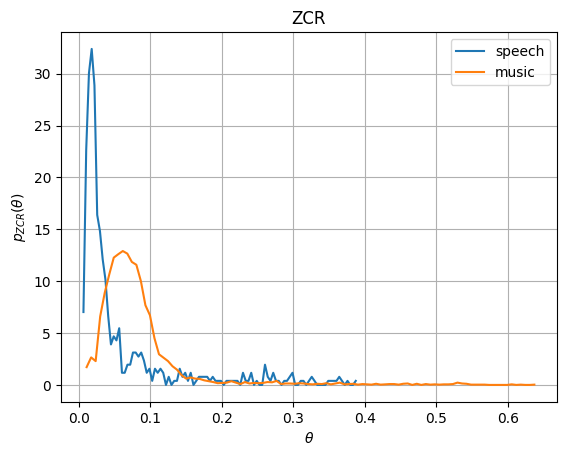

In [9]:
hist_speech, bins_speech = np.histogram(ZCR_speech, bins=100, density=True)
hist_music, bins_music = np.histogram(ZCR_music, bins=100, density=True)

plt.plot(bins_speech[1:], hist_speech, label='speech')
plt.plot(bins_music[1:], hist_music, label='music')
plt.xlabel(r'$\theta$')
plt.ylabel(r'$p_{ZCR}(\theta)$')
plt.title('ZCR')
plt.legend()
plt.grid()

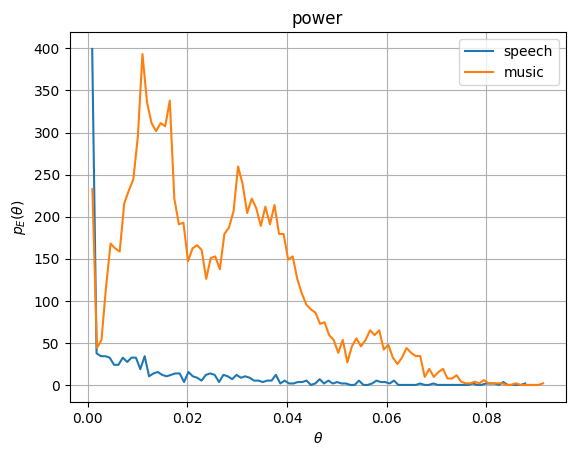

In [10]:
hist_speech, bins_speech = np.histogram(P_speech, bins=100, density=True)
hist_music, bins_music = np.histogram(P_music, bins=100, density=True)

plt.plot(bins_speech[1:], hist_speech, label='speech')
plt.plot(bins_music[1:], 10*hist_music, label='music')
plt.xlabel(r'$\theta$')
plt.ylabel(r'$p_{E}(\theta)$')
plt.title('power')
plt.legend()
plt.grid()

**Copyright**

This notebook is provided as [Open Educational Resource](https://de.wikipedia.org/wiki/Open_Educational_Resources).
The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/)
, the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: Sascha Spors, Data driven audio signal processing - Lecture supplementals.